# NEUB CSE-432 Spring 2025 Lab 10

## Task 1
DFT by Divide and Conquer Approach

Text(0.5, 1.0, 'DFT by Divide and conquer method')

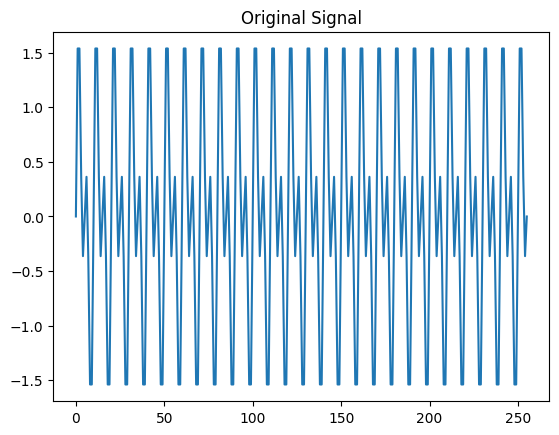

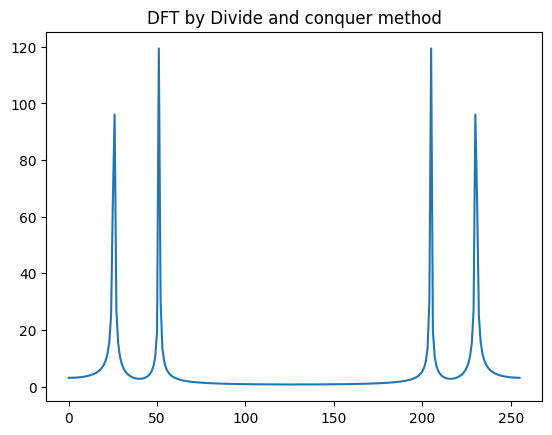

In [10]:
import numpy as np
import matplotlib.pyplot as plt

F1 = 100
F2 = 200
Fs = 1000 # Sampling frequency (1000Hz)
SL = 256 # Signal length = 256 samples
L = 8 # Matrix reshape dimensions: L × M = 8 × 32
M = 32 # Matrix reshape dimensions: L × M = 8 × 32
N = 256 # DFT size (same as signal length = 256)


s = np.zeros(SL)
for n in range(SL):
    s[n] = np.sin(2*np.pi*F1*n/Fs) + np.sin(2*np.pi*F2*n/Fs)

plt.figure()
plt.plot(s[0:SL])
plt.title("Original Signal")


x = np.reshape(s, (L, M), order="F") # Converting the signal from 1d array to 8x32 array

def DFT(x, N):
    X = np.zeros(N, dtype="complex")
    for i in range(N):
        for k in range(N):
            X[i] += x[k] * np.exp(-1j*2*np.pi*i*k/N)
    return X

F = np.zeros((L, M), dtype="complex")
for l in range(L):
    f = x[l,:]
    F[l, :] = DFT(f, M)

W = np.zeros((L, M), dtype="complex")
for l in range(L):
    for q in range(M):
        W[l, q] = np.exp(-1j*2*np.pi*l*q/N)

G = np.zeros((L, M), dtype="complex")
G = W * F

X = np.zeros((L, M), dtype="complex")
for q in range(M):
    g = G[:, q]
    X[:, q] = DFT(g, L)

Y = np.reshape(X, (N,), order="C")
plt.figure()
plt.plot(abs(Y))
plt.title("DFT by Divide and conquer method")


## Task 2
Moving Average Filter

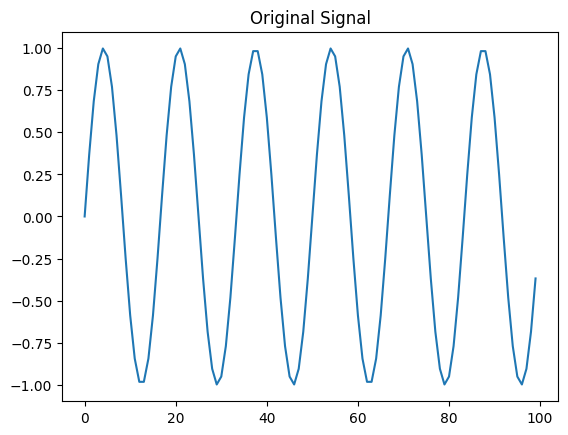

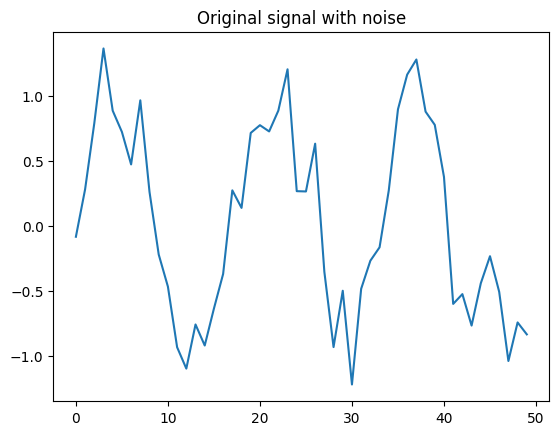

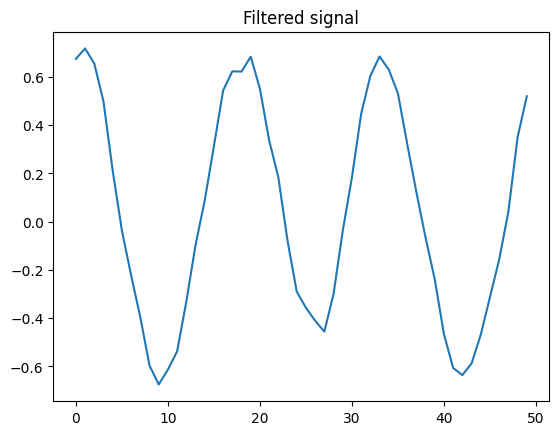

In [19]:
import numpy as np
import matplotlib.pyplot as plt

F = 3
Fs = 50
L = 100

x = np.zeros(L)
for n in range(L):
    x[n] = np.sin(2*np.pi*F*n/Fs)

plt.figure()
plt.plot(x[:N//2])
plt.title("Original Signal")
plt.show()

wn = np.random.normal(0, 1, L)
wn = wn/np.max(wn)
y = x+wn

plt.figure()
plt.plot(y[:L//2])
plt.title("Original signal with noise")
plt.show()

M = 8
z = np.zeros(L)

for i in range(L - M):
    z[i] = sum(y[i: i+M])/M

plt.figure()
plt.plot(z[:L//2])
plt.title("Filtered signal")
plt.show()

## Task 3
Implemenmting moving average filter on random data

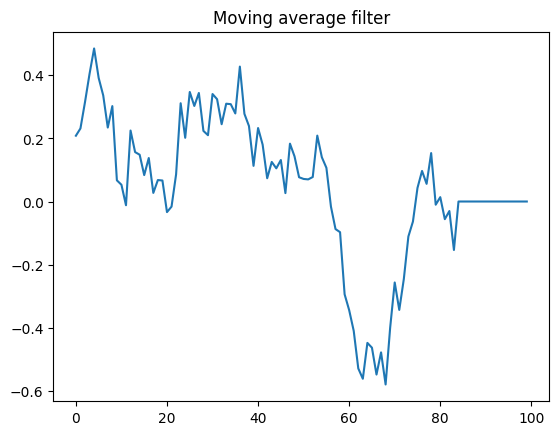

In [21]:
import numpy as np
import matplotlib.pyplot as plt

M = 16

data = np.random.normal(0, 1, 100)
z = np.zeros(len(data))

for i in range(len(data) - M):
    z[i] = sum(data[i: i+M])/M

plt.figure()
plt.plot(z)
plt.title("Moving average filter")
plt.show()